In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
out_dir = "./data/out"
optim_dir = os.path.join(out_dir,"genetic-algorithm")
res_dir = os.path.join(optim_dir, "58")

In [3]:
progress = pd.read_csv(os.path.join(res_dir, "progress.csv"))
progress.tail(10)

,mean fitness,best fitness,population size
30,1391.294550,2093.174316,1030
31,1393.734804,2093.174316,1036
32,1415.469167,2093.174316,1042
33,1410.399456,2093.174316,1048
34,1393.067849,2093.174316,1054
35,1405.437641,2093.174316,1060
36,1376.831678,2093.174316,1066
37,1389.694028,2093.174316,1072
38,1422.387053,2093.174316,1078
39,1406.860574,2093.174316,1084


In [4]:
mean_fitness_idx = "mean fitness"
best_fitness_idx = "best fitness"

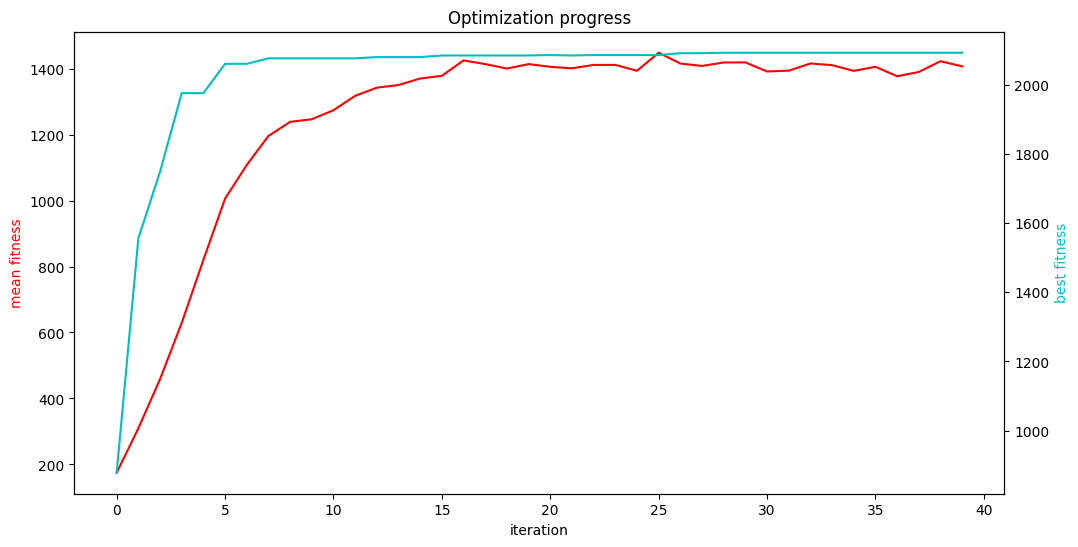

In [5]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax2 = ax1.twinx()
ax1.plot(progress[mean_fitness_idx], 'r-')
ax1.set_ylabel(mean_fitness_idx, color='r')
ax2.plot(progress[best_fitness_idx], 'c-')
ax2.set_ylabel(best_fitness_idx, color='c')

ax1.set_title("Optimization progress")
ax1.set_xlabel("iteration");

In [6]:
progress_path = os.path.join(res_dir, "progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)